In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

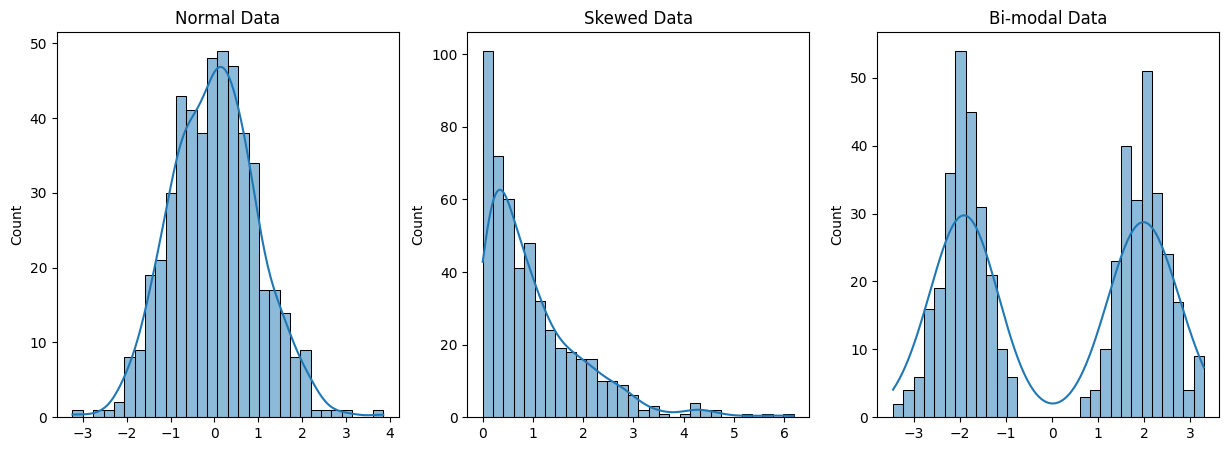

In [2]:
np.random.seed(42)
norm_data = np.random.normal(loc=0, scale=1, size=500)
skewed_data = np.random.exponential(scale=1, size=500)
bi_modal_data = np.concatenate([np.random.normal(-2, 0.5, 250), np.random.normal(2, 0.5, 250)])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (name, data) in zip(axes, {"Normal Data": norm_data, "Skewed Data": skewed_data, "Bi-modal Data": bi_modal_data}.items()):
    sns.histplot(data, bins=30, kde=True, ax=ax)
    ax.set_title(name)
plt.show()

In [3]:
# Shapiro-Wilk Test
shapiro_results = {
    "Normal Data": stats.shapiro(norm_data),
    "Skewed Data": stats.shapiro(skewed_data),
    "Bi-modal Data": stats.shapiro(bi_modal_data)
}

# D'Agostino and Pearson Test
dagostino_results = {
    "Normal Data": stats.normaltest(norm_data),
    "Skewed Data": stats.normaltest(skewed_data),
    "Bi-modal Data": stats.normaltest(bi_modal_data)
}

# Kolmogorov-Smirnov Test
ks_results = {
    "Normal Data": stats.kstest(norm_data, 'norm', args=(np.mean(norm_data), np.std(norm_data))),
    "Skewed Data": stats.kstest(skewed_data, 'norm', args=(np.mean(skewed_data), np.std(skewed_data))),
    "Bi-modal Data": stats.kstest(bi_modal_data, 'norm', args=(np.mean(bi_modal_data), np.std(bi_modal_data)))
}

In [4]:
# Формування таблиці результатів
all_results = {}
for dataset in ["Normal Data", "Skewed Data", "Bi-modal Data"]:
    all_results[dataset] = {
        "Shapiro-Wilk": [shapiro_results[dataset][0], shapiro_results[dataset][1]],
        "D'Agostino and Pearson": [dagostino_results[dataset][0], dagostino_results[dataset][1]],
        "Kolmogorov-Smirnov": [ks_results[dataset][0], ks_results[dataset][1]],
    }

df_results = pd.DataFrame({(dataset, test): values for dataset, tests in all_results.items() for test, values in tests.items()},
                          index=["Statistic", "p-value (або критичне значення)"]).T

# Якщо p-value < 0.05 — розподіл ненормальний.
df_results

Statistic  \
Normal Data   Shapiro-Wilk               0.996702   
              D'Agostino and Pearson     4.223512   
              Kolmogorov-Smirnov         0.027278   
Skewed Data   Shapiro-Wilk               0.828904   
              D'Agostino and Pearson   185.625101   
              Kolmogorov-Smirnov         0.155728   
Bi-modal Data Shapiro-Wilk               0.841013   
              D'Agostino and Pearson  2538.765974   
              Kolmogorov-Smirnov         0.199577   

                                      p-value (або критичне значення)  
Normal Data   Shapiro-Wilk                               4.014205e-01  
              D'Agostino and Pearson                     1.210252e-01  
              Kolmogorov-Smirnov                         8.407131e-01  
Skewed Data   Shapiro-Wilk                               9.962723e-23  
              D'Agostino and Pearson                     4.920640e-41  
              Kolmogorov-Smirnov                         4.684691e-11  
Bi-modal Data Shapiro-Wilk                               5.571335e-22  
              D'Agostino and Pearson                     0.000000e+00  
              Kolmogorov-Smirnov                         6.244817e-18